In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

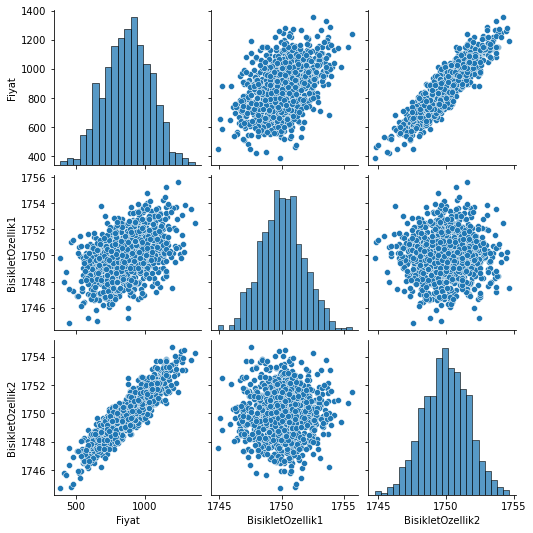

In [5]:
sbn.pairplot(dataFrame)

## veriyi test / train olarak ikiye ayırmak

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

In [13]:
# scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(x_train)

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [105]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [106]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 2s 5ms/step - loss: 795542.6875
Epoch 2/250
21/21 [==============================] - 0s 6ms/step - loss: 795272.3750
Epoch 3/250
21/21 [==============================] - 0s 7ms/step - loss: 794993.0625
Epoch 4/250
21/21 [==============================] - 0s 6ms/step - loss: 794681.7500
Epoch 5/250
21/21 [==============================] - 0s 5ms/step - loss: 794335.6875
Epoch 6/250
21/21 [==============================] - 0s 6ms/step - loss: 793950.8750
Epoch 7/250
21/21 [==============================] - 0s 6ms/step - loss: 793523.8125
Epoch 8/250
21/21 [==============================] - 0s 6ms/step - loss: 793049.8125
Epoch 9/250
21/21 [==============================] - 0s 6ms/step - loss: 792526.5000
Epoch 10/250
21/21 [==============================] - 0s 6ms/step - loss: 791941.7500
Epoch 11/250
21/21 [==============================] - 0s 6ms/step - loss: 791279.3750
Epoch 12/250
21/21 [==============================] - 0s 6ms/st

21/21 [==============================] - 0s 4ms/step - loss: 11386.2568
Epoch 97/250
21/21 [==============================] - 0s 5ms/step - loss: 8496.1094
Epoch 98/250
21/21 [==============================] - 0s 5ms/step - loss: 6871.1699
Epoch 99/250
21/21 [==============================] - 0s 6ms/step - loss: 6220.5752
Epoch 100/250
21/21 [==============================] - 0s 4ms/step - loss: 6070.3711
Epoch 101/250
21/21 [==============================] - 0s 4ms/step - loss: 5976.5137
Epoch 102/250
21/21 [==============================] - 0s 4ms/step - loss: 5888.1719
Epoch 103/250
21/21 [==============================] - 0s 4ms/step - loss: 5790.2739
Epoch 104/250
21/21 [==============================] - 0s 4ms/step - loss: 5690.5039
Epoch 105/250
21/21 [==============================] - 0s 4ms/step - loss: 5600.9390
Epoch 106/250
21/21 [==============================] - 0s 4ms/step - loss: 5509.6050
Epoch 107/250
21/21 [==============================] - 0s 4ms/step - loss: 5409.6

21/21 [==============================] - 0s 4ms/step - loss: 343.6151
Epoch 193/250
21/21 [==============================] - 0s 5ms/step - loss: 319.0959
Epoch 194/250
21/21 [==============================] - 0s 3ms/step - loss: 301.7411
Epoch 195/250
21/21 [==============================] - 0s 3ms/step - loss: 283.4215
Epoch 196/250
21/21 [==============================] - 0s 3ms/step - loss: 264.2647
Epoch 197/250
21/21 [==============================] - 0s 3ms/step - loss: 249.6255
Epoch 198/250
21/21 [==============================] - 0s 4ms/step - loss: 233.2432
Epoch 199/250
21/21 [==============================] - 0s 3ms/step - loss: 220.0052
Epoch 200/250
21/21 [==============================] - 0s 3ms/step - loss: 206.3083
Epoch 201/250
21/21 [==============================] - 0s 3ms/step - loss: 191.3132
Epoch 202/250
21/21 [==============================] - 0s 3ms/step - loss: 177.9260
Epoch 203/250
21/21 [==============================] - 0s 4ms/step - loss: 166.0550
Epoch 

In [107]:
loss = model.history.history["loss"]

<AxesSubplot:>

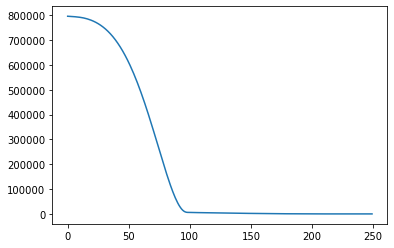

In [108]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [109]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [110]:
testLoss = model.evaluate(x_test,y_test, verbose=0)

In [111]:
trainLoss

74.09294128417969

In [112]:
testLoss

80.72067260742188

In [113]:
testTahminleri = model.predict(x_test)

In [114]:
testTahminleri

array([[1076.5388 ],
       [ 623.034  ],
       [ 875.04047],
       [ 893.2735 ],
       [ 898.5516 ],
       [ 451.14563],
       [ 930.0589 ],
       [ 990.31   ],
       [ 939.98444],
       [1015.5963 ],
       [ 749.9987 ],
       [ 916.69037],
       [ 946.47394],
       [1053.4451 ],
       [1120.05   ],
       [ 680.77386],
       [1125.7687 ],
       [ 650.2797 ],
       [1153.383  ],
       [ 885.4654 ],
       [ 891.7624 ],
       [ 715.8215 ],
       [ 456.16675],
       [ 611.40436],
       [ 833.95135],
       [1089.8861 ],
       [ 712.9522 ],
       [ 756.0185 ],
       [ 872.50604],
       [ 769.73004],
       [ 450.76697],
       [ 782.0661 ],
       [ 727.42255],
       [ 646.08374],
       [ 885.70844],
       [ 842.81726],
       [1034.5005 ],
       [1021.69507],
       [ 843.8886 ],
       [ 861.24054],
       [ 756.2183 ],
       [1173.2988 ],
       [1096.3379 ],
       [1086.5376 ],
       [ 872.01215],
       [ 595.8814 ],
       [1144.5696 ],
       [ 972.

In [115]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [116]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [117]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [118]:
testTahminleri

0      1076.538818
1       623.033997
2       875.040466
3       893.273499
4       898.551575
          ...     
325    1012.343506
326     789.944031
327     764.995789
328    1166.203491
329     801.911926
Length: 330, dtype: float32

In [119]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [120]:
tahminDf

,Gerçek Y,0
0,1081.652164,1076.538818
1,622.675990,623.033997
2,889.356810,875.040466
3,902.826733,893.273499
4,897.662404,898.551575
...,...,...
325,1028.438035,1012.343506
326,789.934950,789.944031
327,758.490486,764.995789
328,1172.871659,1166.203491


In [121]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [122]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1076.538818
1,622.675990,623.033997
2,889.356810,875.040466
3,902.826733,893.273499
4,897.662404,898.551575
...,...,...
325,1028.438035,1012.343506
326,789.934950,789.944031
327,758.490486,764.995789
328,1172.871659,1166.203491


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

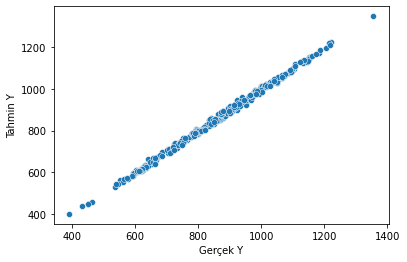

In [123]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [125]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

7.201894922734373

In [126]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

80.7206883770181

In [127]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [132]:
yeniBisikletOzellikleri = [[1753,1751]]

In [133]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [134]:
model.predict(yeniBisikletOzellikleri)

array([[1081.7876]], dtype=float32)

In [135]:
from tensorflow.keras.models import load_model

In [136]:
model.save("bisiklet_modeli.h5")

In [137]:
sonradancagrilanmodel = load_model("bisiklet_modeli.h5")

In [138]:
sonradancagrilanmodel.predict(yeniBisikletOzellikleri)

array([[1081.7876]], dtype=float32)